<a href="https://colab.research.google.com/github/Randrita/IOPONICS/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow

In [ ]:
#GPU SETUP
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import ResNet152V2
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Hydroponics_Plant/data/train'
valid_path = '/content/drive/MyDrive/Hydroponics_Plant/data/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Hydroponics_Plant/data/train/*')

In [ ]:
# our layers - one can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Hydroponics_Plant/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Hydroponics_Plant/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
len(training_set)

61

In [2]:
# fit the model
# Run the cell. It will take some time to exec
batch_size=10
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
import matplotlib.pyplot as plt


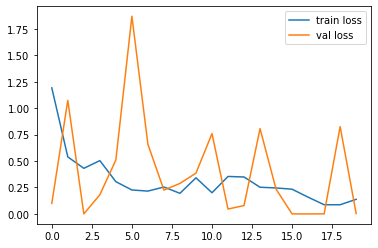

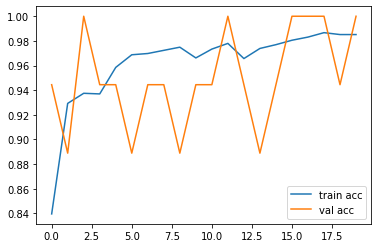

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred


array([[2.18589036e-12, 9.89856243e-01, 1.01436982e-02, 8.98829003e-25],
       [5.38026541e-07, 5.01859722e-06, 2.40135023e-09, 9.99994397e-01],
       [4.98710833e-05, 6.30139932e-02, 1.23023414e-11, 9.36936080e-01],
       [1.05586725e-24, 1.00000000e+00, 2.04559674e-32, 4.61392990e-29],
       [9.28335625e-20, 1.00000000e+00, 1.72640995e-21, 2.12112632e-19],
       [4.10045125e-02, 3.14593462e-09, 9.58995521e-01, 4.35508435e-10],
       [9.99917626e-01, 3.67282212e-11, 8.23730370e-05, 9.36101026e-18],
       [7.88509246e-26, 1.00000000e+00, 9.81374775e-35, 2.57277924e-18],
       [1.32499778e-07, 4.14166716e-05, 4.49845994e-11, 9.99958396e-01],
       [1.33870008e-08, 9.99979854e-01, 7.98442042e-12, 2.01989405e-05],
       [1.65137792e-17, 5.98456791e-05, 7.61564610e-17, 9.99940157e-01],
       [1.00000000e+00, 3.58907349e-28, 2.84826552e-24, 3.20997165e-33],
       [1.28565103e-10, 1.33020897e-29, 1.00000000e+00, 1.20335229e-24],
       [5.54319701e-09, 5.17204876e-22, 1.00000000e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 3, 3, 1, 1, 2, 0, 1, 3, 1, 3, 0, 2, 2, 2, 3, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet152V2.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Hydroponics_Plant/data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [ ]:
!curl  -i -X POST -H "Content-Type: multipart/form-data" -F 'file=@/content/drive/MyDrive/Hydroponics_Plant/data/test/diseased cotton leaf/dis_leaf (124).jpg' https://5000-randrita-ioponics-nkzyp05sbgp.ws-us44.gitpod.io/ml

HTTP/2 200 
content-type: application/json
date: Sat, 07 May 2022 19:24:33 GMT
server: Werkzeug/2.1.2 Python/3.8.13
content-length: 113

{
    "output": [
        [
            0.0,
            0.0,
            1.0,
            0.0
        ]
    ]
}


In [ ]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.imagenet_utils import preprocess_input


import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


array([[0., 1., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)


In [ ]:
#disease hole false asbe, else true
a==1

array([ True])

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
!mkdir tf-models

In [ ]:
import time

#save model
ts = int(time.time())
file_path = f"tf-models/img_classifier/{ts}/"
model.save(filepath=file_path, save_format='tf')

INFO:tensorflow:Assets written to: tf-models/img_classifier/1651945290/assets


In [ ]:
txt = '''model_config_list: {
    config: {
        name: "img_classifier",
        base_path: "/tf-models/img_classifier",
        model_platform: "tensorflow",
        model_version_policy: {all: {}}
    }
}'''

open('tf-models/models.conf', 'w').write(txt)

open('tf-models/models.conf', 'r').read()

'model_config_list: {\n    config: {\n        name: "img_classifier",\n        base_path: "/tf-models/img_classifier",\n        model_platform: "tensorflow",\n        model_version_policy: {all: {}}\n    }\n}'

In [ ]:
import tarfile
import os

def tar_folder(output_filename: str, source_dir: str):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

OUT_FILE = 'tf-models.tar.gz'

SOURCE_FILE = "tf-models"

tar_folder(output_filename=OUT_FILE, source_dir=SOURCE_FILE)

In [ ]:
# !tar -zxvf "tf-models.tar.gz"

tf-models/
tf-models/img_classifier/
tf-models/img_classifier/1651945290/
tf-models/img_classifier/1651945290/assets/
tf-models/img_classifier/1651945290/keras_metadata.pb
tf-models/img_classifier/1651945290/saved_model.pb
tf-models/img_classifier/1651945290/variables/
tf-models/img_classifier/1651945290/variables/variables.data-00000-of-00001
tf-models/img_classifier/1651945290/variables/variables.index
tf-models/models.conf
